# SC4020 Project

## Grouping based on K-means and DBScan

### https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

## Data Preprocessing

In [24]:
df = pd.read_csv('./StudentsPerformance.csv')

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [27]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


Doesnt seem to be a issue with data

## Exploratory Data Analysis

Find out more about the data and how it looks

### Gender

In [6]:
unique_gender = df['gender'].unique()
print(unique_gender)

['female' 'male']


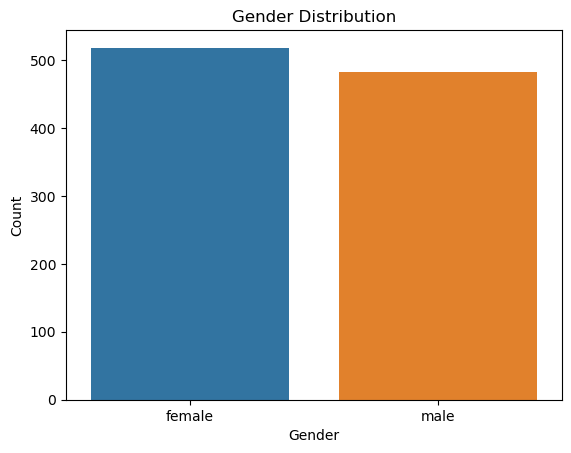

In [7]:
value_counts = df['gender'].value_counts()

sb.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()

### Race/Ethnicity

In [8]:
unique_race = df['race/ethnicity'].unique()
print(unique_race)

['group B' 'group C' 'group A' 'group D' 'group E']


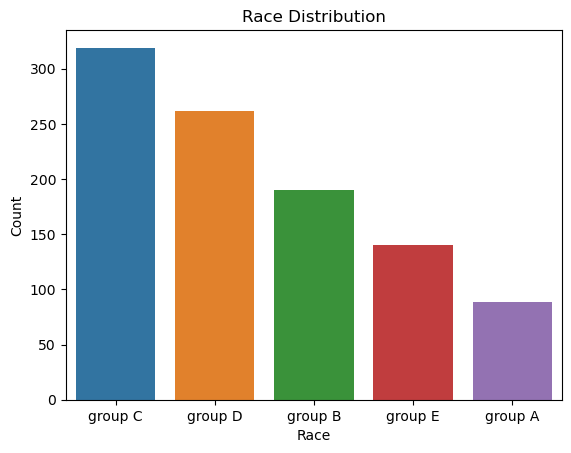

In [9]:
group_counts = df['race/ethnicity'].value_counts()

sb.barplot(x=group_counts.index, y=group_counts.values)

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')


plt.show()

### parental level of education

In [10]:
unique_parentedu = df['parental level of education'].unique()
print(unique_parentedu)

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


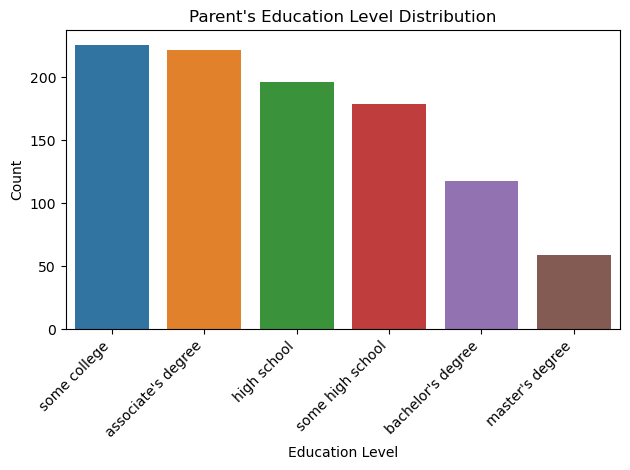

In [11]:
education_counts = df['parental level of education'].value_counts()


sb.barplot(x=education_counts.index, y=education_counts.values)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Parent\'s Education Level Distribution')

plt.tight_layout()  
plt.show()

### lunch         

In [12]:
unique_lunch = df['lunch'].unique()
print(unique_lunch)

['standard' 'free/reduced']


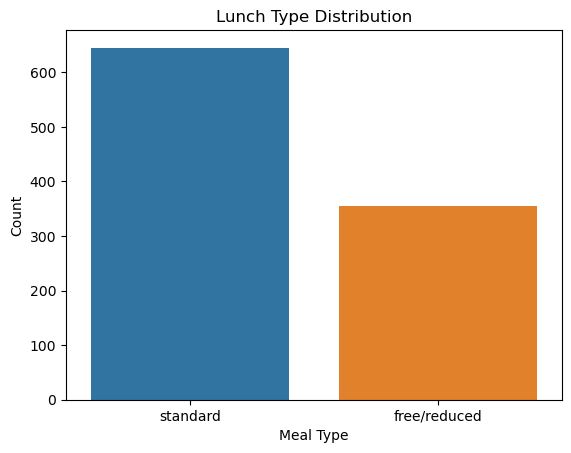

In [13]:
meal_counts = df['lunch'].value_counts()

sb.barplot(x=meal_counts.index, y=meal_counts.values)

plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title('Lunch Type Distribution')

plt.show()

### test preparation course 

In [14]:
unique_testprep = df['test preparation course'].unique()
print(unique_testprep)

['none' 'completed']


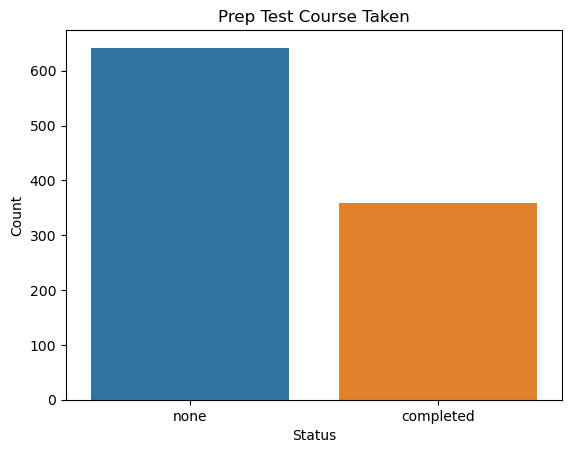

In [15]:
status_counts = df['test preparation course'].value_counts()

sb.barplot(x=status_counts.index, y=status_counts.values)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Prep Test Course Taken')

# Show the plot
plt.show()

### math score, reading score and writing score           

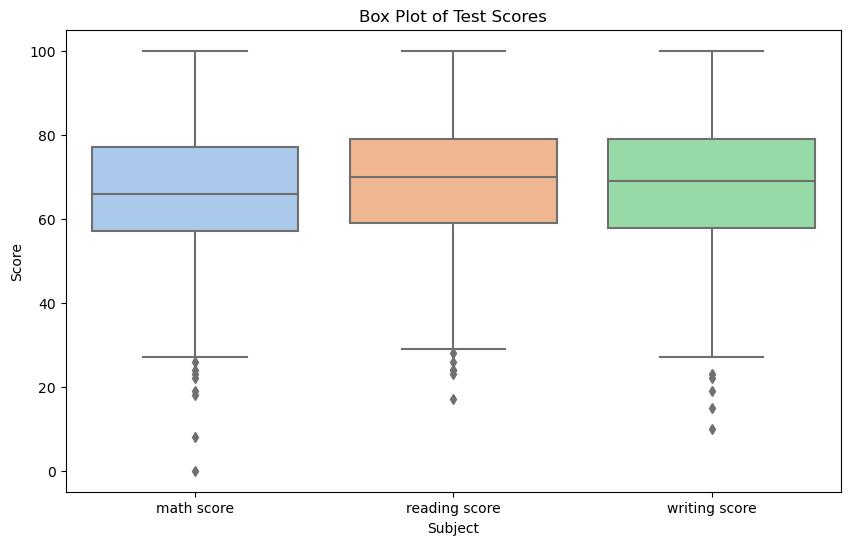

In [23]:
df_melted = df.melt(value_vars=['math score', 'reading score', 'writing score'], 
                    var_name='Subject', 
                    value_name='Score')

plt.figure(figsize=(10, 6))

sb.boxplot(x='Subject', y='Score', data=df_melted, palette='pastel')

plt.xlabel('Subject')
plt.ylabel('Score')
plt.title('Box Plot of Test Scores')

plt.show()


# do I remove outliers? - currently no reason to

## We want to find out what affects a student performance, so we will use K-means clustering to cluster the students based on their grades, and discover potential patterns linking to exam performance

In [35]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [36]:
# perform min-max scaling on data

X = df[['math score', 'reading score', 'writing score']]  # features clustering is based on
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

We use the elbow method to determine/aproximate a optimal k-number of centroids

C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

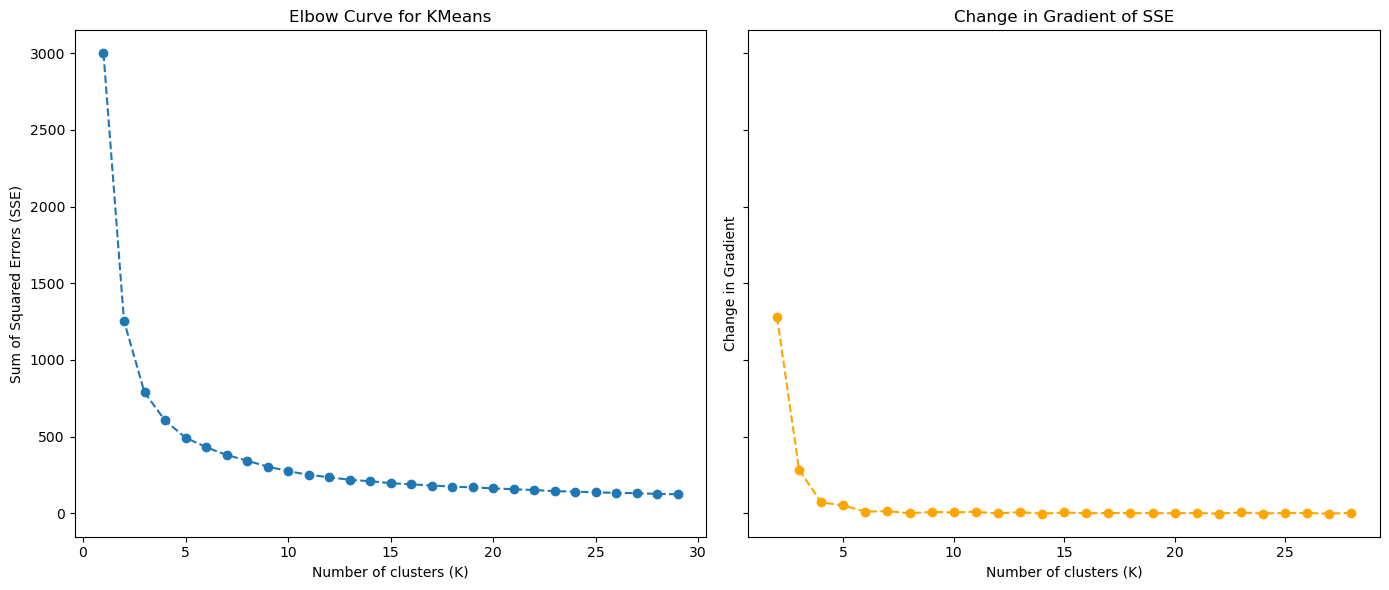

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_scaled is your standardized data

# Calculate SSE for KMeans
sse = []
k_values = range(1, 30)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Calculate the first derivative (change in SSE)
sse_diff = np.diff(sse)

# Calculate the change in gradient (second derivative)
gradient_change = np.diff(sse_diff)

# Plotting the elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Elbow Curve for KMeans
axes[0].plot(k_values, sse, marker='o', linestyle='--')
axes[0].set_xlabel('Number of clusters (K)')
axes[0].set_ylabel('Sum of Squared Errors (SSE)')
axes[0].set_title('Elbow Curve for KMeans')

# Gradient Change Plot
# Note: gradient_change will have length len(sse_diff) - 1
k_values_diff = k_values[1:-1]  # Adjust k_values to match gradient_change length
axes[1].plot(k_values_diff, gradient_change, marker='o', linestyle='--', color='orange')
axes[1].set_xlabel('Number of clusters (K)')
axes[1].set_ylabel('Change in Gradient')
axes[1].set_title('Change in Gradient of SSE')

plt.tight_layout()
plt.show()


In [38]:
# Choose the optimal number of clusters (from elbow plot)
k_optimal = 6

# Fit the K-Means model
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# Get new column cluster for labeling
df['Cluster'] = kmeans.labels_


C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


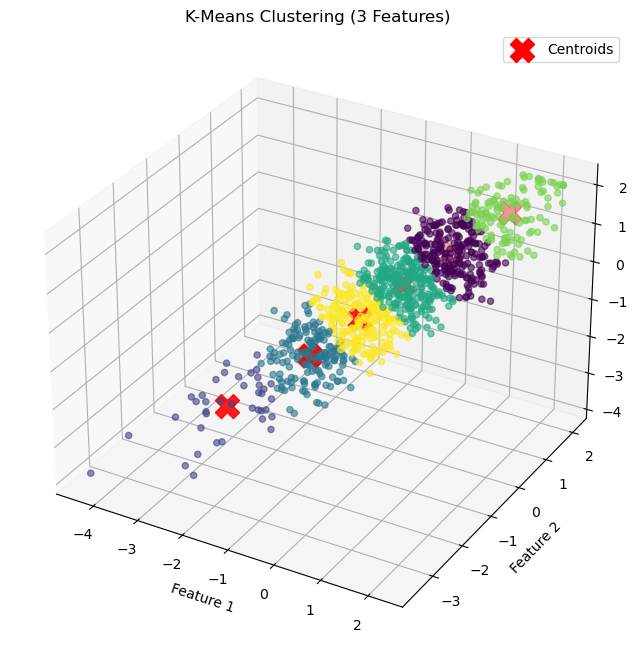

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, colored by cluster
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='viridis', alpha=0.6)

# Plot the cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-Means Clustering (3 Features)')
plt.legend()
plt.show()


C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\minez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

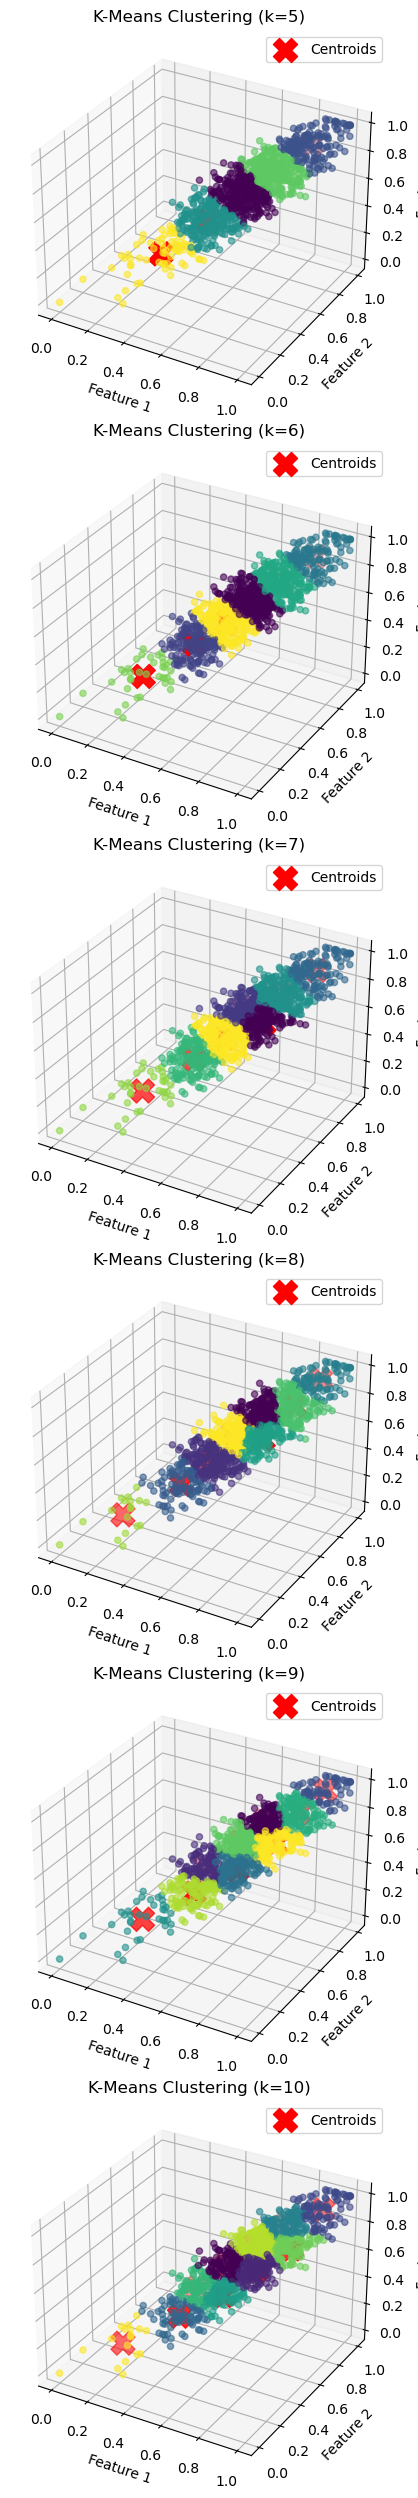

In [40]:
# repeat to observe different k values

# Assuming df is your DataFrame with 'math score', 'reading score', 'writing score'
df_copy = df.copy()
X = df_copy[['math score', 'reading score', 'writing score']]  # Features clustering is based on

# Perform Min-Max scaling on the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of k values to compare 
k_values = range(5, 11)

# Initialize a large figure for subplots
fig = plt.figure(figsize=(10, 25))  

# Loop through k values to fit K-Means and plot the clusters
for idx, k in enumerate(k_values, start=1):
    # Fit the K-Means model for the current k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Add the cluster labels to the DataFrame
    df_copy['Cluster'] = kmeans.labels_
    
    # Create a subplot for the current k value
    ax = fig.add_subplot(len(k_values), 1, idx, projection='3d')
    
    # Scatter plot for the data points, colored by cluster
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df_copy['Cluster'], cmap='viridis', alpha=0.6)
    
    # Plot the cluster centers
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
               s=300, c='red', marker='X', label='Centroids')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.legend()

plt.tight_layout()
plt.show()



In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,3,218
1,female,group C,some college,standard,completed,69,90,88,0,247
2,female,group B,master's degree,standard,none,90,95,93,4,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,2,148
4,male,group C,some college,standard,none,76,78,75,0,229


In [42]:
# Group by clusters and calculate average scores and counts
cluster_summary = df.groupby('Cluster').agg({
    'gender': lambda x: x.value_counts().to_dict(),
    'race/ethnicity': lambda x: x.value_counts().to_dict(),
    'parental level of education': lambda x: x.value_counts().to_dict(),
    'lunch': lambda x: x.value_counts().to_dict(),
    'test preparation course': lambda x: x.value_counts().to_dict(),
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean',
    'total_score': 'mean'
}).reset_index()

# Calculate ratios for categorical attributes
def calculate_ratios(df, column):
    ratios = {}
    for _, row in df.iterrows():
        total = sum(row[column].values())
        ratios[row['Cluster']] = {k: v / total for k, v in row[column].items()}
    return ratios

# Calculate ratios for each categorical attribute
ratios_gender = calculate_ratios(cluster_summary, 'gender')
ratios_race_ethnicity = calculate_ratios(cluster_summary, 'race/ethnicity')
ratios_parental_education = calculate_ratios(cluster_summary, 'parental level of education')
ratios_lunch = calculate_ratios(cluster_summary, 'lunch')
ratios_test_prep_course = calculate_ratios(cluster_summary, 'test preparation course')

# Create a new DataFrame to store the ratios
ratios_df = pd.DataFrame({
    'Cluster': cluster_summary['Cluster'],
    'gender_ratio': [ratios_gender[c] for c in cluster_summary['Cluster']],
    'race/ethnicity_ratio': [ratios_race_ethnicity[c] for c in cluster_summary['Cluster']],
    'parental level of education_ratio': [ratios_parental_education[c] for c in cluster_summary['Cluster']],
    'lunch_ratio': [ratios_lunch[c] for c in cluster_summary['Cluster']],
    'test preparation course_ratio': [ratios_test_prep_course[c] for c in cluster_summary['Cluster']],
    'math score': cluster_summary['math score'],
    'reading score': cluster_summary['reading score'],
    'writing score': cluster_summary['writing score'],
    'total_score': cluster_summary['total_score']
})

In [43]:
# average scores of clustsers descending: 4,0,3,5,2,1
ratios_df.head()

,Cluster,gender_ratio,race/ethnicity_ratio,parental level of education_ratio,lunch_ratio,test preparation course_ratio,math score,reading score,writing score,total_score
0,0,"{'female': 0.5605381165919282, 'male': 0.43946...","{'group D': 0.29596412556053814, 'group C': 0....","{'associate's degree': 0.24663677130044842, 's...","{'standard': 0.7174887892376681, 'free/reduced...","{'none': 0.515695067264574, 'completed': 0.484...",76.605381,80.520179,79.156951,236.282511
1,1,"{'female': 0.5641025641025641, 'male': 0.43589...","{'group B': 0.28205128205128205, 'group C': 0....","{'some high school': 0.3076923076923077, 'high...","{'free/reduced': 0.7692307692307693, 'standard...","{'none': 0.8717948717948718, 'completed': 0.12...",32.358974,36.589744,34.025641,102.974359
2,2,"{'male': 0.6193548387096774, 'female': 0.38064...","{'group C': 0.3096774193548387, 'group D': 0.2...","{'high school': 0.3032258064516129, 'associate...","{'free/reduced': 0.5032258064516129, 'standard...","{'none': 0.7935483870967742, 'completed': 0.20...",49.464516,51.490323,49.374194,150.329032
3,3,"{'female': 0.5423076923076923, 'male': 0.45769...","{'group C': 0.35, 'group D': 0.296153846153846...","{'high school': 0.21923076923076923, 'some col...","{'standard': 0.7038461538461539, 'free/reduced...","{'none': 0.6153846153846154, 'completed': 0.38...",67.192308,70.680769,70.307692,208.180769
4,4,"{'female': 0.6583333333333333, 'male': 0.34166...","{'group C': 0.2833333333333333, 'group E': 0.2...","{'associate's degree': 0.2833333333333333, 'so...","{'standard': 0.8583333333333333, 'free/reduced...","{'completed': 0.5333333333333333, 'none': 0.46...",88.275000,91.325000,91.133333,270.733333


In [44]:
# Define the new cluster order based on average scores (descending)
new_order = {4: 0, 0: 1, 3: 2, 5: 3, 2: 4, 1: 5}

# Reindex clusters in DataFrame
ratios_df['Cluster'] = ratios_df['Cluster'].map(new_order)

# Reorder columns for better readability
ratios_df = ratios_df.sort_values(by='Cluster')

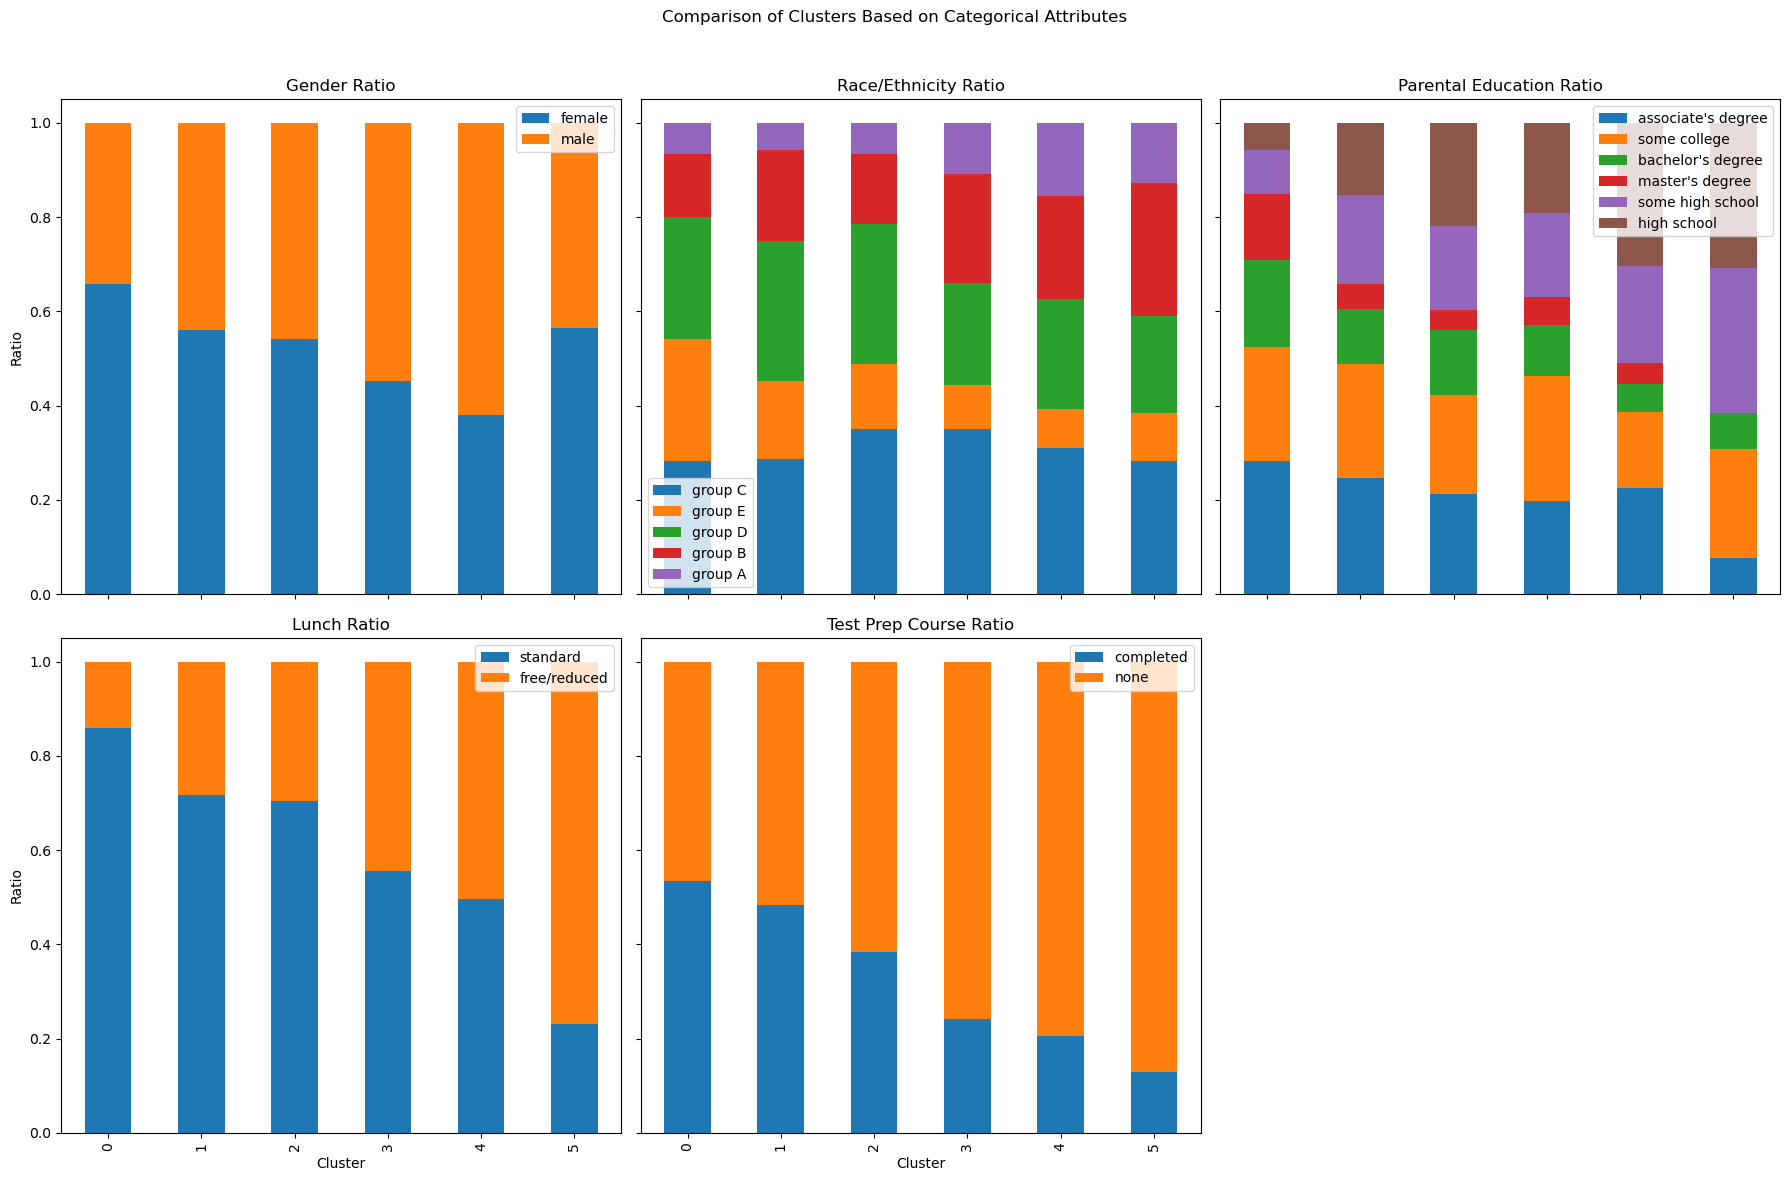

In [45]:
# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle('Comparison of Clusters Based on Categorical Attributes')

# Gender Ratio
gender_df = pd.DataFrame(ratios_df['gender_ratio'].tolist(), index=ratios_df['Cluster'])
gender_df.plot(kind='bar', ax=axes[0, 0], stacked=True)
axes[0, 0].set_title('Gender Ratio')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Ratio')

# Race/Ethnicity Ratio
race_df = pd.DataFrame(ratios_df['race/ethnicity_ratio'].tolist(), index=ratios_df['Cluster'])
race_df.plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_title('Race/Ethnicity Ratio')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Ratio')

# Parental Level of Education Ratio
education_df = pd.DataFrame(ratios_df['parental level of education_ratio'].tolist(), index=ratios_df['Cluster'])
education_df.plot(kind='bar', ax=axes[0, 2], stacked=True)
axes[0, 2].set_title('Parental Education Ratio')
axes[0, 2].set_xlabel('Cluster')
axes[0, 2].set_ylabel('Ratio')

# Lunch Ratio
lunch_df = pd.DataFrame(ratios_df['lunch_ratio'].tolist(), index=ratios_df['Cluster'])
lunch_df.plot(kind='bar', ax=axes[1, 0], stacked=True)
axes[1, 0].set_title('Lunch Ratio')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Ratio')

# Test Preparation Course Ratio
test_prep_df = pd.DataFrame(ratios_df['test preparation course_ratio'].tolist(), index=ratios_df['Cluster'])
test_prep_df.plot(kind='bar', ax=axes[1, 1], stacked=True)
axes[1, 1].set_title('Test Prep Course Ratio')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Ratio')

# Hide the empty subplot
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Analysis

Gender: male tend to perform worse than female especially at higher scores (take into account ~30 more females than males from eda)

Race: group E tend to perform better, group A worse others no significant pattern

Parental Education: those who perform well tend to have more educated parents, vice versa for those who perform worse, they tend to have less educated parents

Lunch Ratio: those who take standard lunch tend to perform better than those who take free lunch (socio-economic)

Test Prep Course Ratio: those who do better tend to take the test prep

## DBSCAN 

In [46]:
# Load the dataset
df = pd.read_csv('./StudentsPerformance.csv')

# Create a new 'total_score' column
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Select the relevant columns for clustering
df_clustering = df[['math score', 'reading score', 'writing score']]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

# Define a range of eps values and min_samples values for testing
eps_values = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
min_samples_values = [5,7,9]

# Prepare to store results for visualization
results = []

# Iterate over eps and min_samples values to apply DBSCAN and store the number of clusters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster'] = dbscan.fit_predict(scaled_data)
        
        # Count the number of clusters excluding noise (-1)
        n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
        results.append((eps, min_samples, n_clusters))

# Convert the results to a DataFrame for display
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters'])

# Display the results
print(results_df)


    eps  min_samples  n_clusters
0   0.1            5          10
1   0.1            7           3
2   0.1            9           1
3   0.2            5          11
4   0.2            7          16
5   0.2            9          10
6   0.3            5           4
7   0.3            7           5
8   0.3            9           4
9   0.4            5           2
10  0.4            7           2
11  0.4            9           2
12  0.6            5           2
13  0.6            7           2
14  0.6            9           3
15  0.8            5           2
16  0.8            7           2
17  0.8            9           2
18  1.0            5           2
19  1.0            7           2
20  1.0            9           2


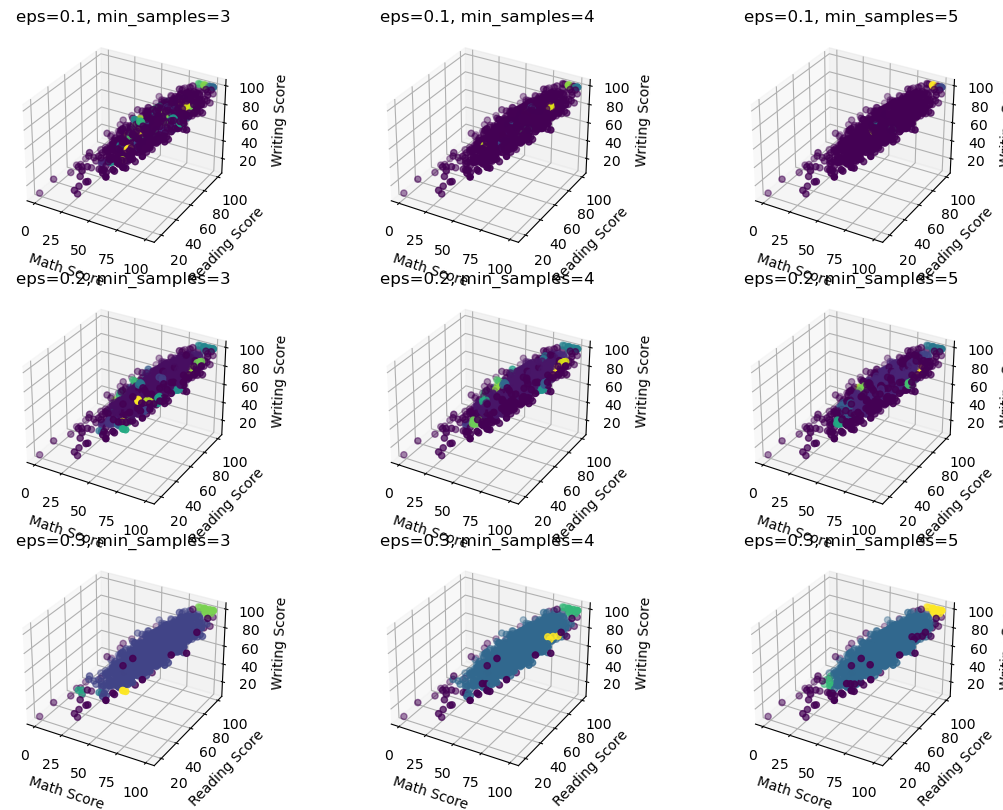

In [47]:
# Define eps values and min_samples values for testing
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 4, 5]

# Set up figure for subplots
fig = plt.figure(figsize=(12, 8))

# We'll create multiple 3D scatter plots for each combination
plot_index = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster'] = dbscan.fit_predict(scaled_data)
        
        # Create a new subplot for each eps and min_samples combination
        ax = fig.add_subplot(3, len(min_samples_values), plot_index, projection='3d')
        
        # Scatter plot
        scatter = ax.scatter(df['math score'], df['reading score'], df['writing score'], 
                             c=df['Cluster'], cmap='viridis', marker='o', s=20)
        
        # Set labels and title
        ax.set_xlabel('Math Score')
        ax.set_ylabel('Reading Score')
        ax.set_zlabel('Writing Score')
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        
        plot_index += 1

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()


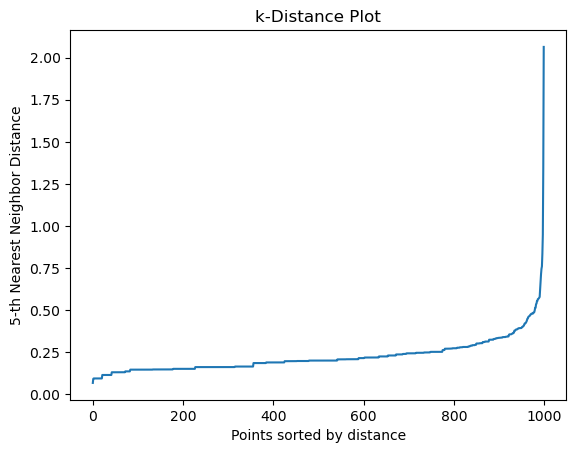

In [51]:
# get a good value for eps

# Number of nearest neighbors to use (usually min_samples - 1)
k = 5

# Fit NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort distances and plot
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('k-Distance Plot')
plt.show()


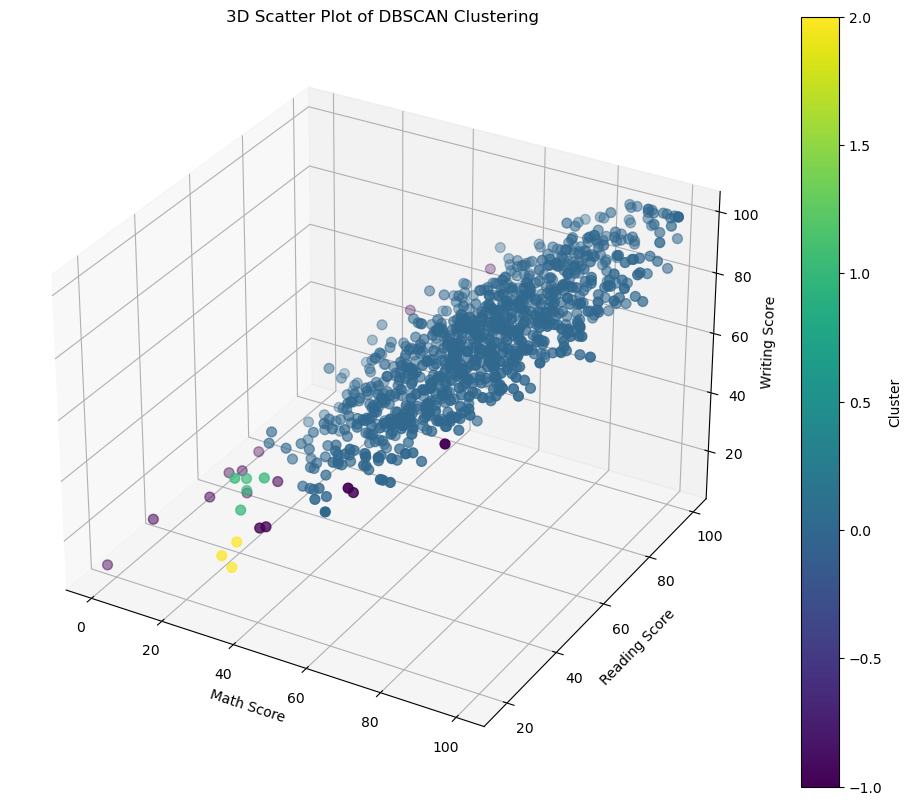

In [48]:
# reset df
df = pd.read_csv('./StudentsPerformance.csv')
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Select the relevant columns for clustering
df_clustering = df[['math score', 'reading score', 'writing score']]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=4)  # Adjust 'eps' and 'min_samples' as needed
df['Cluster'] = dbscan.fit_predict(scaled_data)


# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['math score'], df['reading score'], df['writing score'], c=df['Cluster'], cmap='viridis', marker='o', s=50)

# Labels and title
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
ax.set_title('3D Scatter Plot of DBSCAN Clustering')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

## Why does DBSCAN not work? Possible reasons

No Clear Dense Regions in the Data:<br>
DBSCAN relies on finding dense regions in the data. If the data lacks such density (or has overlapping clusters), DBSCAN may fail to separate them effectively.<br>
In our data, we do not have clear density seperations thus DBSCAN is not suitable for this data.